# Importing XDF files in HyPyP
@Author : [@jonasmago](https://github.com/jonasmago) & [@FranckPrts](https://github.com/FranckPrts).

Last updated: September 2023

This tutorial guides you in using the `XDF_IMPORT` class provided by [hypyp.io.py](https://github.com/ppsp-team/HyPyP/blob/master/hypyp/io.py).

[XDF files](https://github.com/sccn/xdf) are generally produced by [LSL](https://labstreaminglayer.readthedocs.io/index.html) when recording multi-stream time-series data generated in different modalities (e.g., EEG, video, audio). This open-source format enables associating extensive meta information. It is tailored for biosignal data (e.g., EEG, EOG, ECG, MEG) but still supports high sampling rate data (e.g., audio) or high-channel data (e.g., video, fMRI).

In this tutorial, we convert 2 streams from a sample XDF (containing 2 EEG streams and 4 video streams) into 2 `mne.Raw`.


## Imports & path to XDF file

In [1]:
from hypyp.io import XDF_IMPORT

path_xdf = "../data/SAMPLE-XDF.xdf" #insert path to XDF file here

## The `XDF_IMPORT` class

The class has the following arguments:
- `path` : (str) Path to LSL data (i.e., XDF file). Can be absolute or relative. 
- `stream_idx` : (list) List of the stream index(es) in the XDF the user whish to import (must be of type "EEG"). By default, `None`. When set to `None`, `stream_idx` is appended the index of all streams of type `"EEG"`.
- `eeg_montage` (string) montage to apply to the eeg object that are converted. (all montages availables with mne can be found by running `mne.channels.get_builtin_montages()`)
- `sfreq` : (float) Sampling frequency, can either be set automatically by the class or given by the user.
- `print_stream_name` : (boolean) Wheather the class should print the stream and their respective index in the XDF. By default, `True`.
- `convert_all_eeg` : (boolean) Defines if the class must automatically look for stream(s) of `type="EEG"` and convert them. By default, `True`.
- `type` : (str) Define which type of stream the user is looking for. When converting EEG streams, or using  `convert_all_eeg=True`, the type must be set to "EEG". By default, `"EEG"`.

First, we instanciat the class naively with the following argument to take a look at our XDF content: 
```
print_stream_name   = True
convert_all_eeg     = False
```

*We leave `sfreq` and `type` to their respective defaults so the class respectively determines the sampling rate and search for the EEG streams and their respective informations.*

In [2]:
eeg = XDF_IMPORT(path_xdf, print_stream_name=True, convert_all_eeg=False)

Stream 3: Calculated effective sampling rate 25.0023 Hz is different from specified rate 30.0000 Hz.


List of available stream(s):
	Stream SNS_082L_N_EEG is at idx:0
	Stream SNS_081S_N_EEG is at idx:1
	Stream VideoStream_1 is at idx:2
	Stream VideoStream_0 is at idx:3
	Stream VideoStream_1 is at idx:4
	Stream VideoStream_0 is at idx:5

Run XDF_IMPORT again with convert_all_eeg=True or specify the stream(s) you wish to convert using the list arg stream_idx.
To see the available streams in your XDF, re-run XDF_IMPORT with print_stream_name=True.


**Great!** Now we know what our XDF is conposed of. Let's explore different ways of converting on or multiple EEG stream from it into `mne.Raw` object(s).

### 4 ways to use `IMPORT_XDF`


Here we look into 4 examples where we use `IMPORT_XDF` to convert the EEG streams into `mne.Raw`(s):
- **Situation 1:** The user wants to (blindly) **convert all** available EEG stream(s) in the XDF into `mne.Raw`(s)
- **Situation 2:** The user knows the index of one or multiple EEG stream to convert

#### Situation 1
The user wants to (blindly) **convert all** available EEG stream(s) in the XDF into `mne.Raw`(s).

In [3]:
eeg = XDF_IMPORT(path_xdf, print_stream_name=False, convert_all_eeg=True)

Stream 3: Calculated effective sampling rate 25.0023 Hz is different from specified rate 30.0000 Hz.



Looking for EEG stream(s)
	Found EEG stream SNS_081S_N_EEG at index: 1
	Found EEG stream SNS_082L_N_EEG at index: 0

	--> Found 2 EEG stream(s) at index [1, 0]

Converting EEG stream(s) ... 

---> Converting SNS_081S_N_EEG
sampling freq is 500.0Hz
Creating RawArray with float64 data, n_channels=24, n_times=150272
    Range : 0 ... 150271 =      0.000 ...   300.542 secs
Ready.
[defaultdict(<class 'list'>, {'manufacturer': ['mBrainTrain'], 'cap': [defaultdict(<class 'list'>, {'name': ['EasyCap'], 'size': ['54'], 'labelscheme': ['10-20'], 'filetype': ['sfp']})], 'channels': [defaultdict(<class 'list'>, {'type': ['EEG'], 'channel': [defaultdict(<class 'list'>, {'label': ['Fp1'], 'location': [defaultdict(<class 'list'>, {'X': ['-270.0'], 'Y': ['860.0'], 'Z': ['360.0']})]}), defaultdict(<class 'list'>, {'label': ['Fp2'], 'location': [defaultdict(<class 'list'>, {'X': ['270.0'], 'Y': ['860.0'], 'Z': ['360.0']})]}), defaultdict(<class 'list'>, {'label': ['F3'], 'location': [defaultdict(<class

In [4]:
eeg.raw_all

{'SNS_081S_N_EEG': <RawArray | 24 x 150272 (300.5 s), ~27.5 MB, data loaded>,
 'SNS_082L_N_EEG': <RawArray | 24 x 150272 (300.5 s), ~27.5 MB, data loaded>}

#### Situation 2
The user knows the indexes of the **multiple** EEG streams they want to convert. Here using both the chanel indexes and names.

In [5]:
eeg = XDF_IMPORT(path_xdf, stream_idx= [0, "081S"], print_stream_name=False, convert_all_eeg=False)

Stream 3: Calculated effective sampling rate 25.0023 Hz is different from specified rate 30.0000 Hz.



Converting EEG stream(s) ... 

---> Converting SNS_082L_N_EEG
sampling freq is 500.0Hz
Creating RawArray with float64 data, n_channels=24, n_times=150272
    Range : 0 ... 150271 =      0.000 ...   300.542 secs
Ready.
[defaultdict(<class 'list'>, {'manufacturer': ['mBrainTrain'], 'cap': [defaultdict(<class 'list'>, {'name': ['EasyCap'], 'size': ['54'], 'labelscheme': ['10-20'], 'filetype': ['sfp']})], 'channels': [defaultdict(<class 'list'>, {'type': ['EEG'], 'channel': [defaultdict(<class 'list'>, {'label': ['Fp1'], 'location': [defaultdict(<class 'list'>, {'X': ['-270.0'], 'Y': ['860.0'], 'Z': ['360.0']})]}), defaultdict(<class 'list'>, {'label': ['Fp2'], 'location': [defaultdict(<class 'list'>, {'X': ['270.0'], 'Y': ['860.0'], 'Z': ['360.0']})]}), defaultdict(<class 'list'>, {'label': ['F3'], 'location': [defaultdict(<class 'list'>, {'X': ['-470.0'], 'Y': ['620.0'], 'Z': ['800.0']})]}), defaultdict(<class 'list'>, {'label': ['F4'], 'location': [defaultdict(<class 'list'>, {'X': ['4

In [6]:
eeg.raw_all

{'SNS_082L_N_EEG': <RawArray | 24 x 150272 (300.5 s), ~27.5 MB, data loaded>,
 'SNS_081S_N_EEG': <RawArray | 24 x 150272 (300.5 s), ~27.5 MB, data loaded>}

# Extracting the XDF_IMPORT's output(s)

You can now find the `Raw` that were converted in the dictionary `eeg.raw_all`:

In [7]:
eeg.raw_all

{'SNS_082L_N_EEG': <RawArray | 24 x 150272 (300.5 s), ~27.5 MB, data loaded>,
 'SNS_081S_N_EEG': <RawArray | 24 x 150272 (300.5 s), ~27.5 MB, data loaded>}

To extract one of the `mne.Raw` object form the `eeg` class, you can do the following:

In [9]:
standalone_raw = eeg.raw_all["SNS_082L_N_EEG"]
standalone_raw

<RawArray | 24 x 150272 (300.5 s), ~27.5 MB, data loaded>

The name of the original XDF stream name is also stored in the `subject_info` dictionary nested in `Raw.Info`. So even if you separate a `Raw` from its key, you can still find the stream name's in its info.

In [10]:
# Print the name of the stream from the Raw.info object itself
print(f"standalone_raw subject info: {standalone_raw.info['subject_info']['his_idstr']}")

standalone_raw subject info: SNS_082L_N_EEG


Once extracted, you can perform any analysis to the `standalone_raw` as you would with a `mne.Raw`!

Using matplotlib as 2D backend.


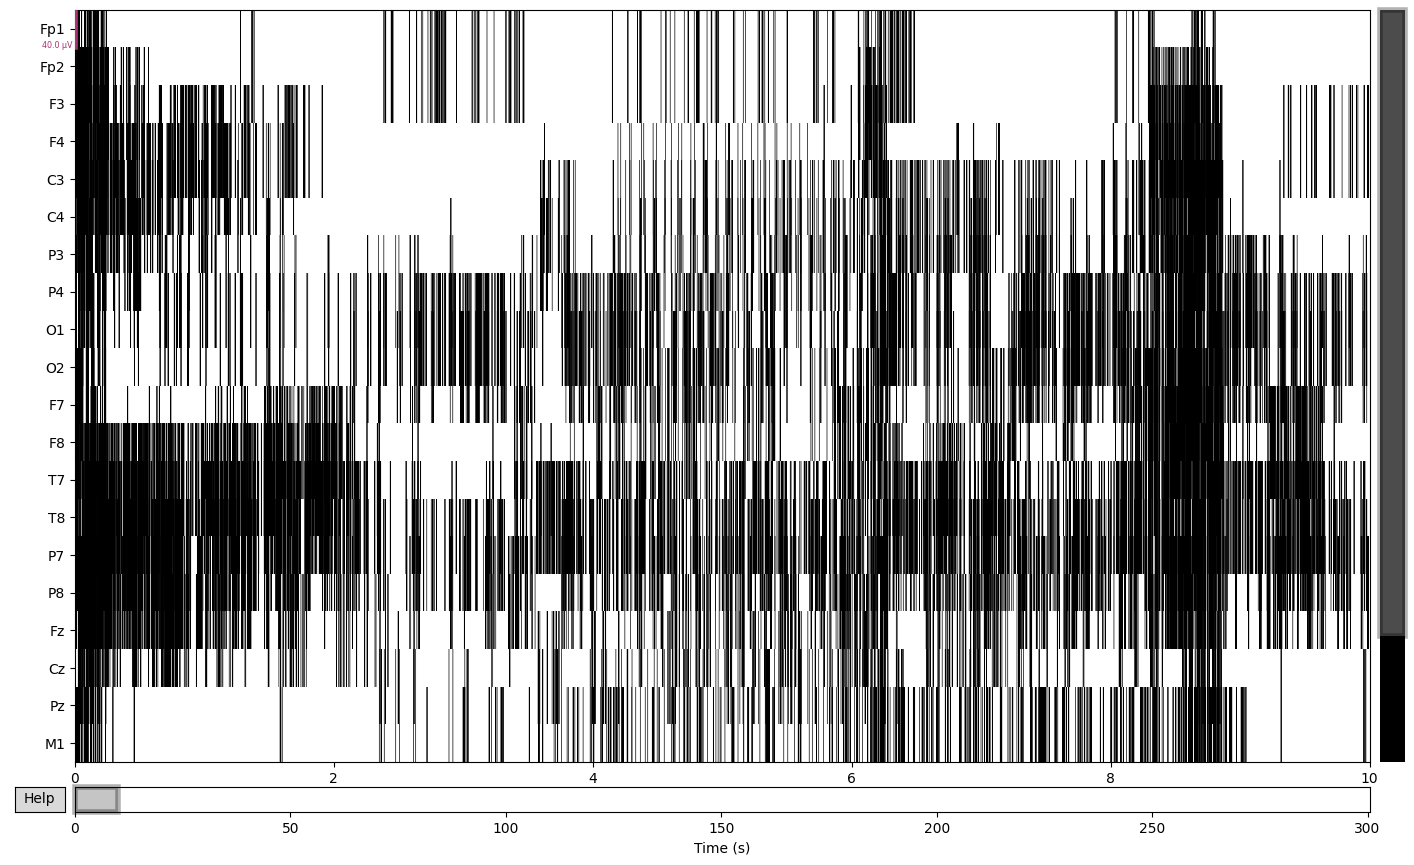

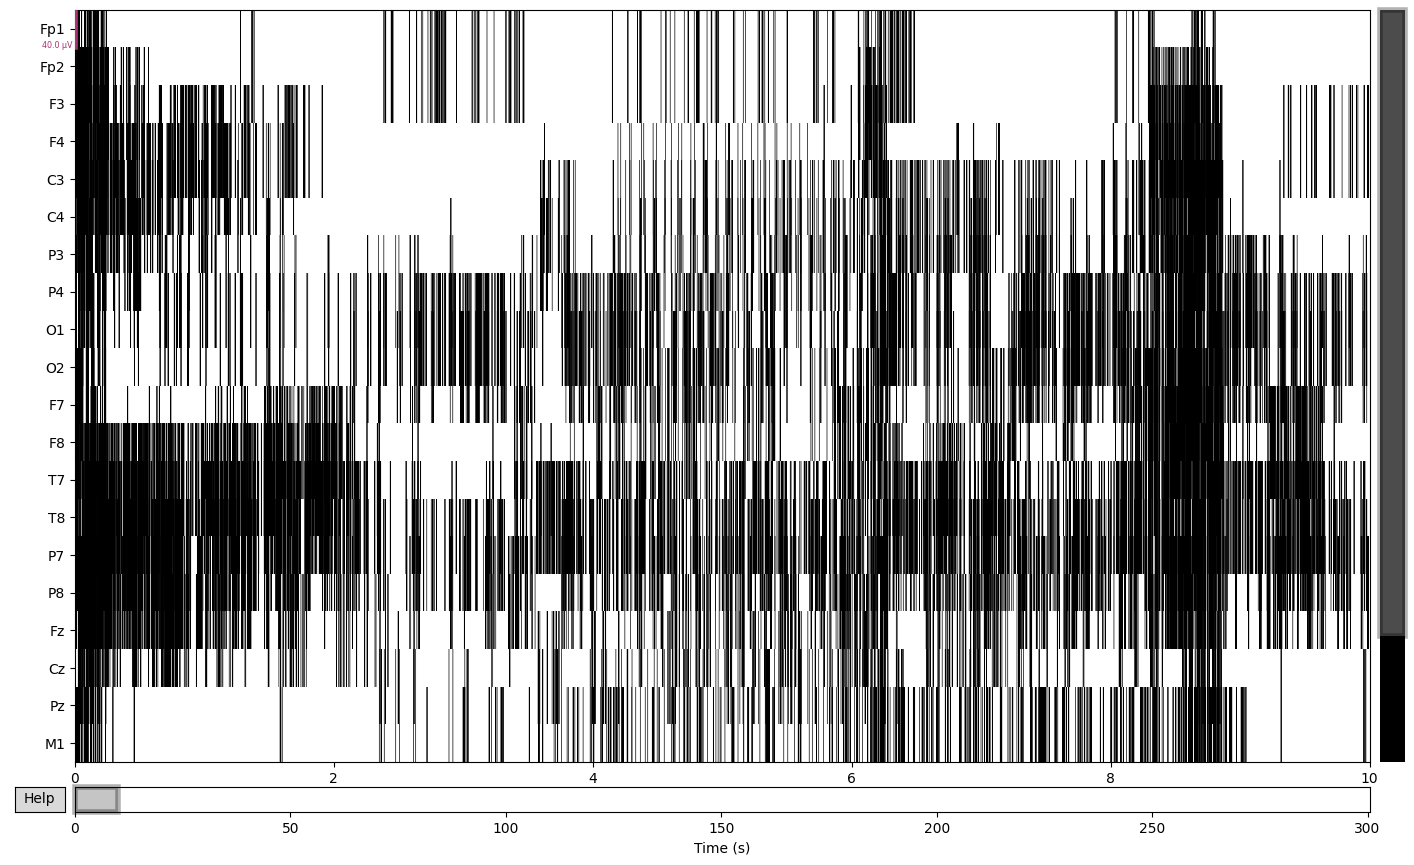

In [11]:
standalone_raw.plot()

## Montage

**Careful!** 

`XDF_IMPORT` does not set the montage automatically! Now that we have converted our stream(s) to `mne.Raw` object(s), we can fix that by setting the montage following [mne's general instruction for setting montage](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#about-montages-and-layouts). For example:

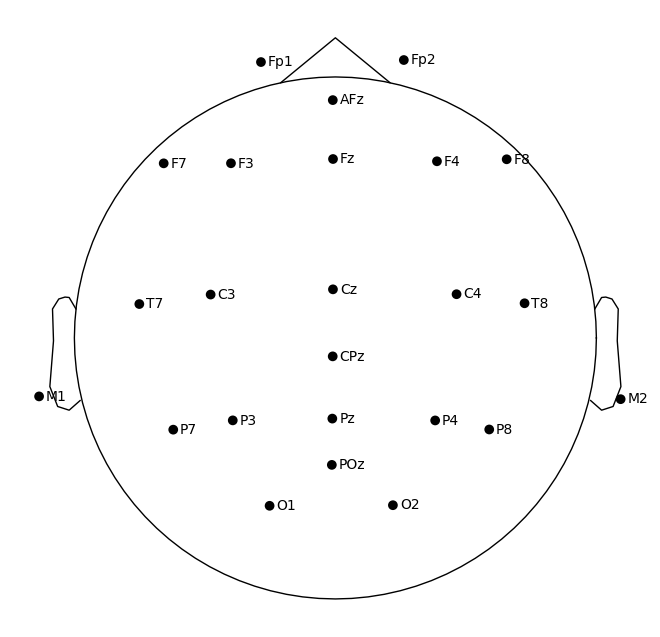

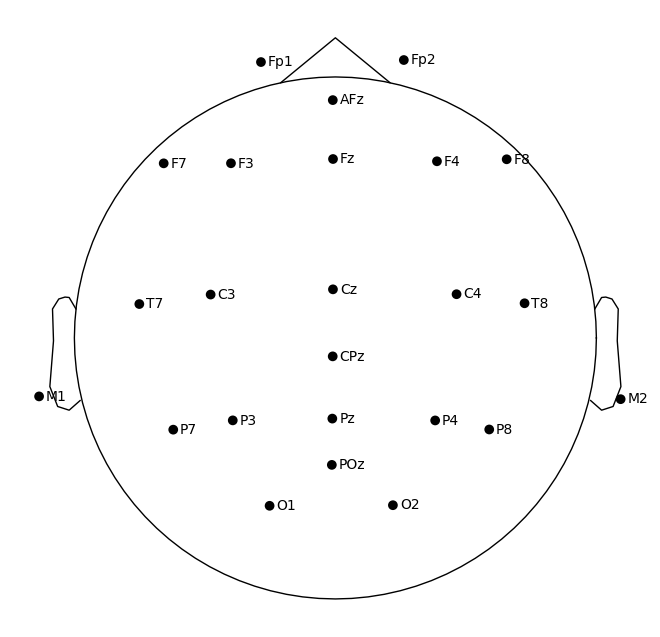

In [12]:
# Set the montage to the standard 10-20 montage
eeg.raw_all['SNS_081S_N_EEG'].set_montage('standard_1020')

# Plot the sensors
eeg.raw_all['SNS_081S_N_EEG'].plot_sensors(show_names=True)

# Bonus

Instead of using indexes to choose which stream must be converted, the user can also indicate the full/partial names of the stream.

```
# With one partial name
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS_082'], print_stream_name=False, convert_all_eeg=False)

# With two partial names
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS_082', '1S_'], print_stream_name=False, convert_all_eeg=False)

# Here, the class will raise an exeption because the input is not precise enough to know which stream to import
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS'], print_stream_name=False, convert_all_eeg=False)

```